In [86]:
# Import important libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [87]:
# read the input files and look at the top few lines #
#data_path = "dataset/2008_2018/"
match_df = pd.read_csv("2000 to 2019.csv",encoding="windows-1252")
player1= pd.read_csv("ODI Player Innings Stats - All Teams.csv",encoding="windows-1252")
final_winner = pd.read_csv("World Cup 2019 Dataset.csv",encoding="windows-1252")
#score_df = pd.read_csv(data_path+"deliveries.csv")
match_df.head()

,Team 1,Result,Winner,Toss,Bat,Team 2,Ground,Start Date,Host_Country,Venue_Team 1,Venue_Team 2,Inning_Team1,Inning_Team2,Team1_Toss,Margin,Team2_Toss,pitch,Winner_Inning,pitchn
0,New Zealand,won,New Zealand,lost,2nd,West Indies,Napier,6-Jan-00,New Zealand,Home,Away,2nd,first,lost,4 wickets,won,fast/green/bouncy,2ndinningwinner,fast/green/swing/bouncy
1,West Indies,lost,New Zealand,won,first,New Zealand,Napier,6-Jan-00,New Zealand,Away,Home,first,2nd,won,4 wickets,lost,fast/green/bouncy,2ndinningwinner,fast/green/swing/bouncy
2,New Zealand,won,New Zealand,won,2nd,West Indies,Wellington,8-Jan-00,New Zealand,Home,Away,2nd,first,won,8 wickets,lost,fast/green/bouncy,2ndinningwinner,fast/green/swing/bouncy
3,West Indies,lost,New Zealand,lost,first,New Zealand,Wellington,8-Jan-00,New Zealand,Away,Home,first,2nd,lost,8 wickets,won,fast/green/bouncy,2ndinningwinner,fast/green/swing/bouncy
4,Australia,lost,Pakistan,lost,2nd,Pakistan,Brisbane,9-Jan-00,Australia,Home,Away,2nd,first,lost,45 runs,won,fast/ bouncy,1stinningwinner,fast/ high bounce


In [88]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of Host Country : ", len(match_df.Host_Country.unique()))

Number of matches played so far :  4507
Number of Host Country :  19


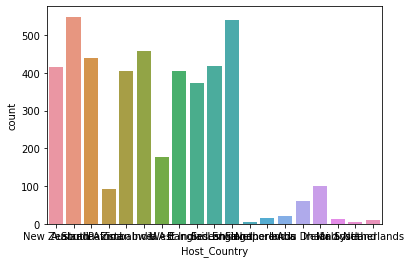

In [89]:
sns.countplot(x='Host_Country', data=match_df)
plt.show()

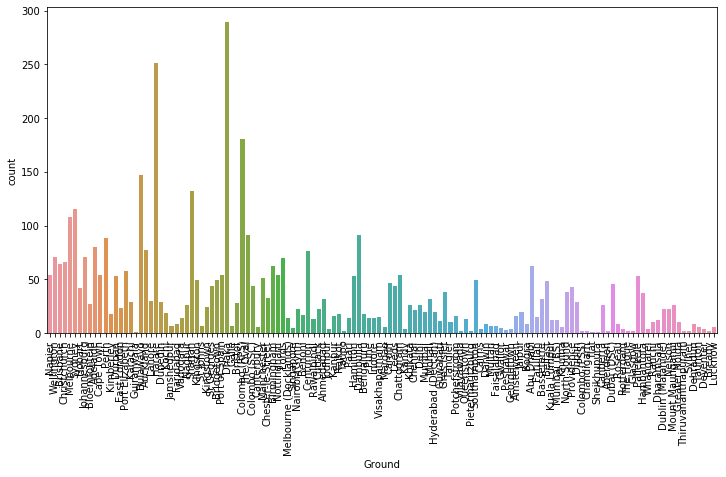

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ground', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

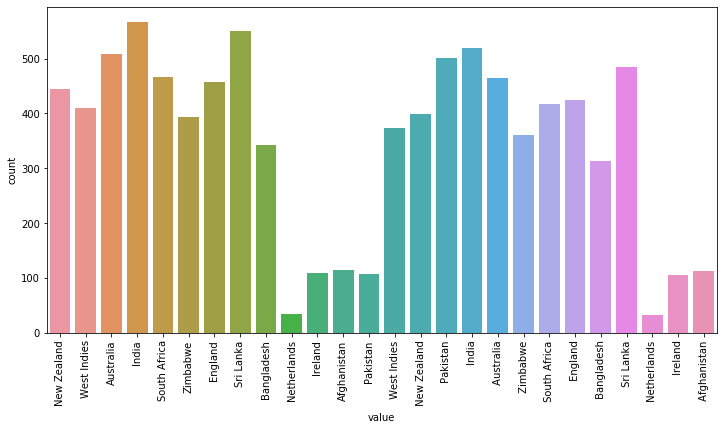

In [91]:
temp_df = pd.melt(match_df, id_vars=['Host_Country','Start Date'], value_vars=['Team 1', 'Team 2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

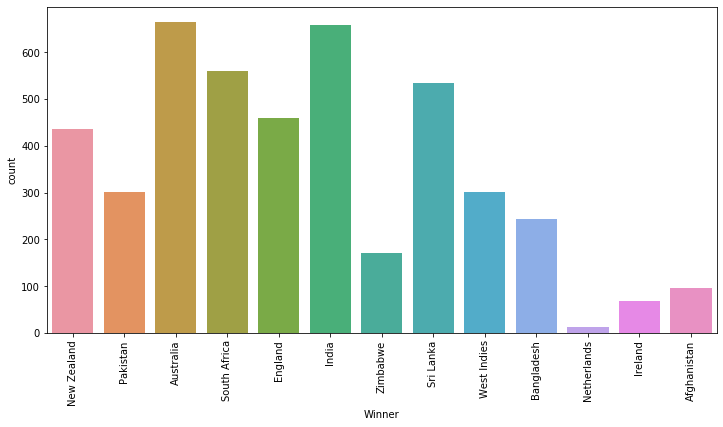

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='Winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
temp_df = match_df.drop_duplicates(subset=['Start Date'], keep='last')[['Start Date', 'Winner']].reset_index(drop=True)
temp_df

,Start Date,Winner
0,6-Jan-00,New Zealand
1,8-Jan-00,New Zealand
2,9-Jan-00,Pakistan
3,10-Jan-00,Pakistan
4,11-Jan-00,New Zealand
...,...,...
1943,30-Sep-19,Pakistan
1944,2-Oct-19,Pakistan
1945,6-Nov-19,West Indies
1946,9-Nov-19,West Indies


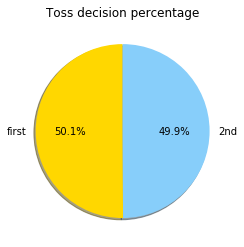

In [94]:
temp_series = match_df.Bat.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

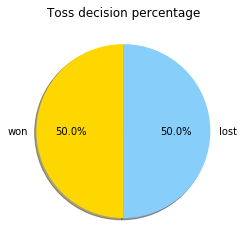

In [95]:
temp_series = match_df.Toss.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

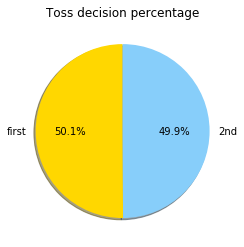

In [96]:
temp_series = match_df.Inning_Team1.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

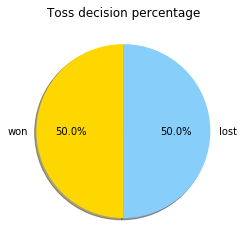

In [97]:
temp_series = match_df.Team1_Toss.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

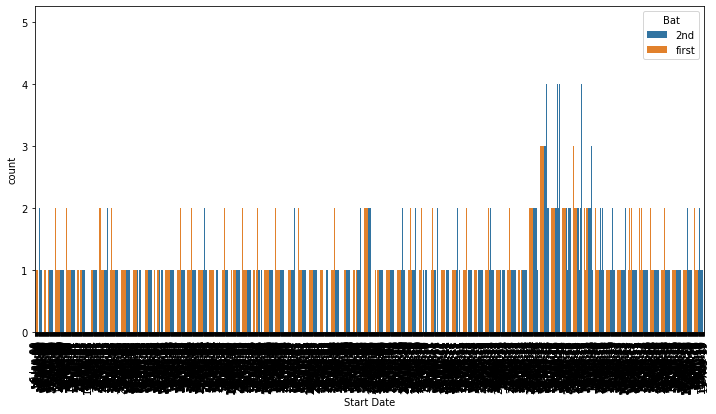

In [98]:
plt.figure(figsize=(12,6))
sns.countplot(x='Start Date', hue='Bat', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

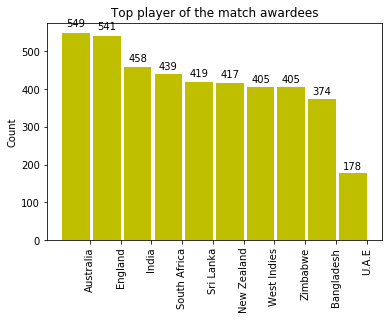

In [99]:
temp_series = match_df.Host_Country.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

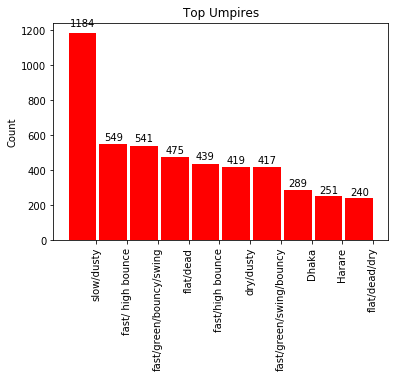

In [100]:
temp_df = pd.melt(match_df, id_vars=['Venue_Team 1'], value_vars=['pitchn', 'Ground'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

C:\Users\RajaZia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


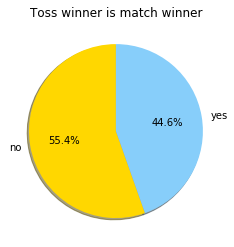

In [104]:
match_df['Toss_is_winner'] = 'no'
match_df['Toss_is_winner'].ix[match_df.Host_Country == match_df.Winner] = 'yes'
temp_series = match_df.Toss_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()

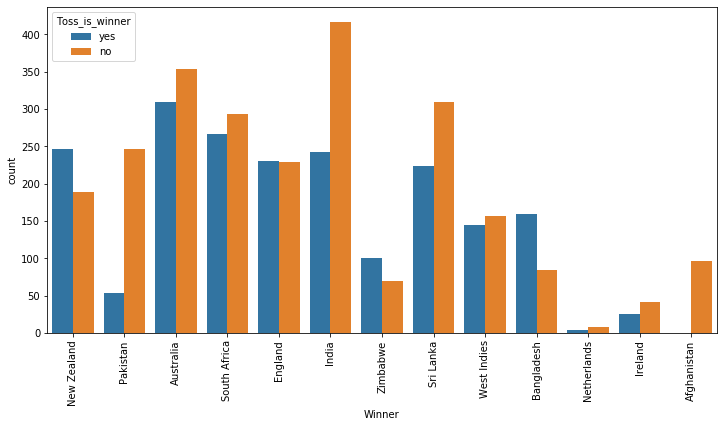

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x='Winner', hue='Toss_is_winner', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
player.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,JJ Roy,180,180,151,1.0,0.0,151,16,5,119.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD Hales,171,171,166,1.0,0.0,122,22,4,140.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RA Smith,167*,167,208,1.0,1.0,163,17,3,102.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JJ Roy,162,162,172,1.0,0.0,118,13,3,137.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DI Gower,158,158,177,1.0,0.0,118,18,4,133.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
temp_df = player.groupby('Innings Boundary Fours')['Innings Runs Scored'].agg('sum').reset_index().sort_values(by='Innings Runs Scored', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['Innings Boundary Fours'])
ind = np.arange(len(labels))
width = 68.3
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['Innings Runs Scored']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

ValueError: Image size of 418253x267 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

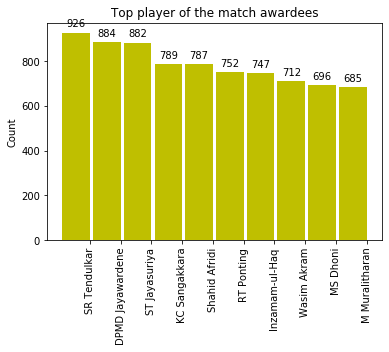

In [108]:

temp_series = player1.InningsPlayer.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

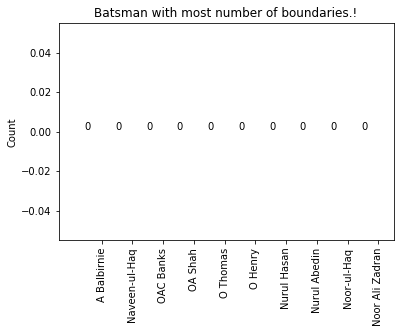

In [111]:
temp_df = player1.groupby('InningsPlayer')['Innings Runs Scored'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='Innings Runs Scored', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['InningsPlayer'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['Innings Runs Scored']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

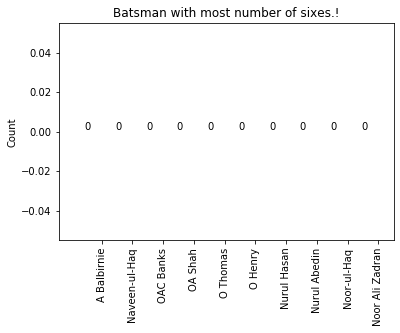

In [113]:
temp_df = player1.groupby('InningsPlayer')['Innings Boundary Sixes'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='Innings Boundary Sixes', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['InningsPlayer'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['Innings Boundary Sixes']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()